In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv("C:\\unikaksha\\datascience\\project_DS\\miniProject7\\creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

#### Create test , train data

In [5]:
X=data.iloc[:,:30]
Y=data.iloc[:,-1]

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.25,random_state=42)

In [7]:
error=[]
for i in range(1,11):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    error.append(np.mean(y_pred!=y_test))

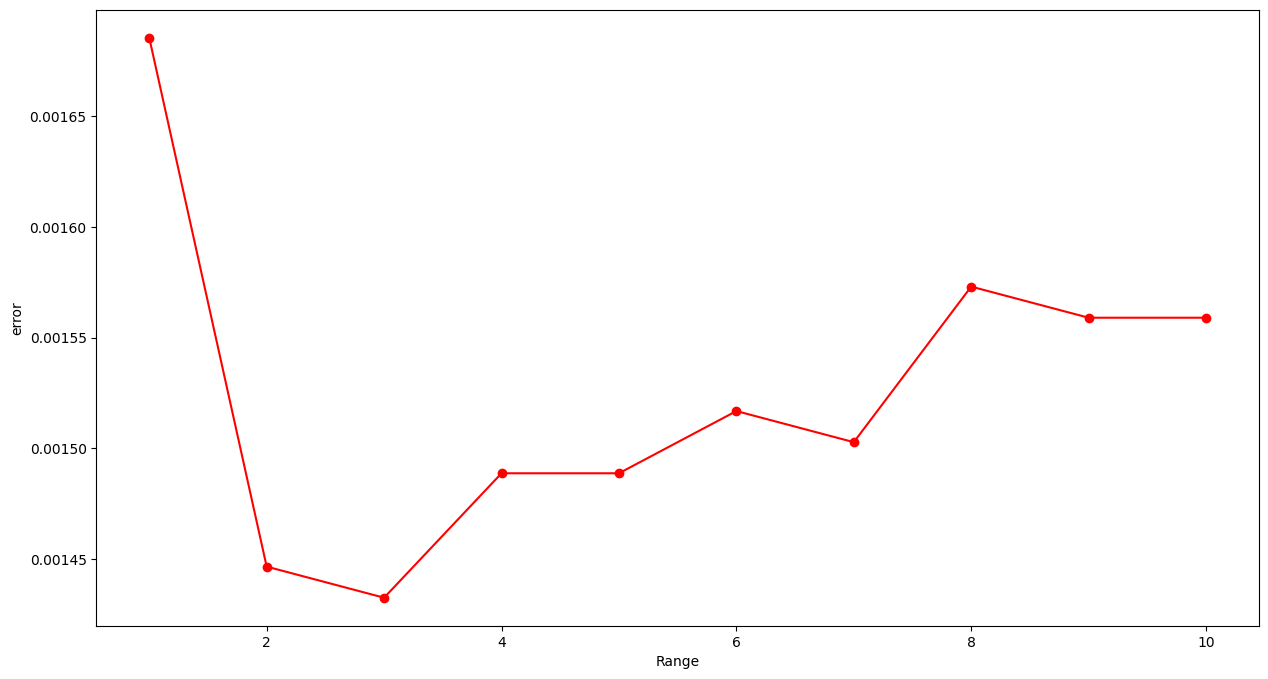

In [8]:
plt.figure(figsize=(15,8))
plt.plot(range(1,11),error,"ro-")
plt.xlabel("Range")
plt.ylabel("error")
plt.show()

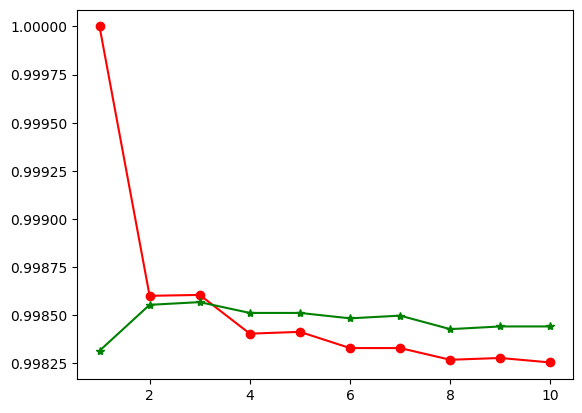

In [11]:
train_ac=[]
test_ac=[]
for i in range(1,11):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    train_ac.append(model.score(x_train,y_train))
    test_ac.append(model.score(x_test,y_test))
#plt.figure(figsize=(15,8))
plt.plot(range(1,11),train_ac,"ro-",label="train accuracy")
plt.plot(range(1,11),test_ac,"g*-",label="test accuracy")
plt.show()

In [13]:
#taking n_neibhour is 3
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_act=y_test
y_pred=knn.predict(x_test)


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_act,y_pred)

0.9985674559703379

In [16]:
confusion_matrix(y_act,y_pred)

array([[71089,     0],
       [  102,    11]], dtype=int64)

In [17]:
print(classification_report(y_act,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       1.00      0.10      0.18       113

    accuracy                           1.00     71202
   macro avg       1.00      0.55      0.59     71202
weighted avg       1.00      1.00      1.00     71202

